# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [5]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [7]:
linreg.fit(X_train, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [8]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 1817188281.1940153
Test Mean Squared Error:  1852373150.018941


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

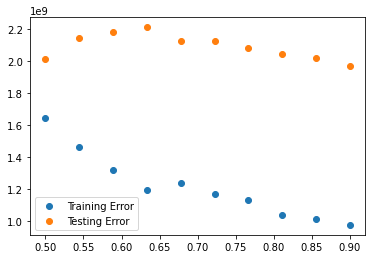

In [11]:
import matplotlib.pyplot as plt

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    # Create new split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=42)

    # Fit transformers on new train and test
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform training data
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform test data
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)

    # Fit model
    linreg.fit(X_train, y_train)

    # Append metrics to their respective lists
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mses.append(mean_squared_error(y_train, y_hat_train))
    test_mses.append(mean_squared_error(y_test, y_hat_test))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Training Error')
ax.scatter(t_sizes, test_mses, label='Testing Error')
ax.legend();

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

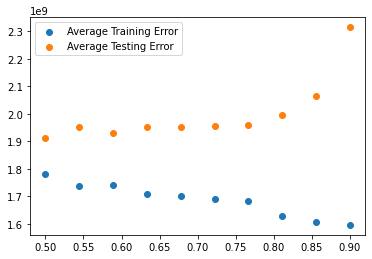

In [12]:

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    inner_train_mses = []
    inner_test_mses = []
    for i in range(10):
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=i)
        
        # Skipping fitting the transformers; data quality issues cause too many OHE problems when
        # fitting this number of different models, but if you don't use drop='first' the
        # multicollinearity issues get pretty bad

        # Transform training data
        X_train = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)

        # Transform test data
        X_test = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)

        # Fit model
        linreg.fit(X_train, y_train)

        # Append metrics to their respective lists
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        inner_train_mses.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mses.append(mean_squared_error(y_test, y_hat_test))

    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Average Training Error')
ax.scatter(t_sizes, test_mses, label='Average Testing Error')
ax.legend();

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.